# Problem Statement

Given dataset contains transactional dataset. Tasks are:
a)	Exploratory Data Analysis
b)	Customer Segmentation
c)	Users profiling based on EDA and Customer Segmentation
d)	Item recommendation for each users
e)	Churn Prediction


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('data.csv', encoding= 'unicode_escape')
dataset.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [3]:
dataset.shape

(541909, 8)

In [4]:
dataset.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
dataset.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


CORRELATED COLUMNS ARE (CUSTOMERID & COUNTRY) 

# Imputation

In [7]:
dataset.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
threshold = 0.4

In [9]:
dataset['Description'].isnull().sum()/dataset.shape[0]

0.002683107311375157

The NULL values in Description column is less than the threshold value

In [10]:
dataset.dropna(subset=['Description'],inplace = True)

In [11]:
dataset['Description'].isnull().sum()

0

In [12]:
dataset['CustomerID'].isnull().sum()/dataset.shape[0]

0.24724722687365275

The NULL values in CustomerID column is less than the threshold value

In [13]:
dataset.dropna(subset=['CustomerID'],inplace = True)

In [14]:
dataset['CustomerID'].isnull().sum()

0

In [15]:
dataset.shape

(406829, 8)

In [16]:
dataset.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# Binning

In [17]:
dataset['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [18]:
dataset['Country'].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

REPLACING THE COUNTRY_NAME WITH OTHERS WHOSE FREQUENCY IS LESS THAN 100

In [19]:
dataset['Country'] = dataset['Country'].replace(['United Arab Emirates','European Community','RSA','Lebanon','Lithuania','Brazil','Czech Republic','Bahrain','Saudi Arabia'],'Others')

In [20]:
dataset['Country'].value_counts()

United Kingdom     361878
Germany              9495
France               8491
EIRE                 7485
Spain                2533
Netherlands          2371
Belgium              2069
Switzerland          1877
Portugal             1480
Australia            1259
Norway               1086
Italy                 803
Channel Islands       758
Finland               695
Cyprus                622
Sweden                462
Austria               401
Denmark               389
Japan                 358
Others                356
Poland                341
USA                   291
Israel                250
Unspecified           244
Singapore             229
Iceland               182
Canada                151
Greece                146
Malta                 127
Name: Country, dtype: int64

# Removing and handling Outliers

REMOVING THE OUTLIER ROWS BY USING INTERQUARTILE RANGE

In [21]:
dataset['Quantity'].describe()

count    406829.000000
mean         12.061303
std         248.693370
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [22]:
a = []
a = np.sort(dataset['Quantity'])
q1 = np.percentile(a,25)
q3 = np.percentile(a,75)
iqr = q3 - q1
upper_lim = q3+1.5*iqr
lower_lim = q1-1.5*iqr
print(upper_lim)
print(lower_lim)

27.0
-13.0


In [23]:
dataset = dataset[(dataset['Quantity'] < upper_lim) & (dataset['Quantity'] > lower_lim)]

In [24]:
dataset['UnitPrice'].describe()

count    380084.000000
mean          3.598304
std          71.701627
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

In [25]:
a = []
a = np.sort(dataset['UnitPrice'])
q1 = np.percentile(a,25)
q3 = np.percentile(a,75)
iqr = q3 - q1
upper_lim = q3+1.5*iqr
lower_lim = q1-1.5*iqr
print(upper_lim)
print(lower_lim)

7.5
-2.5


In [26]:
dataset = dataset[(dataset['UnitPrice'] < upper_lim) & (dataset['UnitPrice'] > lower_lim)]

In [27]:
a = []
for i in dataset['Quantity']:
    if i<=0:
        a.append(i)

In [28]:
print(a)

[-1, -12, -12, -12, -6, -1, -2, -4, -5, -1, -7, -1, -1, -2, -6, -1, -3, -1, -4, -2, -1, -4, -2, -1, -1, -3, -1, -6, -12, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -3, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -6, -1, -2, -1, -4, -10, -1, -1, -1, -1, -4, -4, -6, -12, -4, -4, -6, -12, -1, -6, -1, -1, -8, -11, -2, -2, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -8, -1, -1, -1, -1, -2, -1, -3, -4, -1, -1, -1, -1, -5, -3, -1, -6, -3, -3, -1, -2, -4, -2, -1, -1, -3, -3, -4, -1, -1, -1, -2, -2, -8, -12, -3, -3, -6, -12, -4, -8, -12, -8, -8, -8, -8, -10, -6, -4, -8, -1, -2, -4, -4, -1, -12, -6, -6, -12, -6, -4, -6, -6, -3, -12, -4, -1, -2, -1, -12, -3, -4, -6, -6, -1, -1, -1, -1, -3, -12, -2, -1, -4, -1, -1, -9, -12, -12, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -1, -1, -1, -12, -12, -12, -12, -6, -1, -1, -1, -4, -1, -1, -3, -1, -2, -2, -1, -1, -2, -3, -1, -1, -1, -3, -1, -1, -6, -1, -1, -1, -1, -1, -1, -12, -1, -11, -3, -2, -2, -1, -3, -12, -3, -3, -2, -2, -

Negative Quantity  and 0 value rows must be excluded

In [29]:
dataset = dataset[(dataset['Quantity']>0)]

In [30]:
b = []
for i in dataset['UnitPrice']:
    if i<=0:
        b.append(i)

In [31]:
print(b)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [32]:
dataset = dataset[(dataset['UnitPrice']>0)]

In [33]:
dataset.shape

(337527, 8)

# Log transformation

In [34]:
dataset['Log_Transformed_Quantity'] = (dataset['Quantity']).transform(np.log1p)

In [35]:
dataset['Log_Transformed_UnitPrice'] = (dataset['UnitPrice']).transform(np.log1p)

In [36]:
dataset.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Transformed_Quantity,Log_Transformed_UnitPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.945910,1.266948
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2.197225,1.321756
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,1.945910,1.658228
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,1.945910,1.047319
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,1.945910,1.047319
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,12/1/2010 8:34,2.10,13047.0,United Kingdom,1.945910,1.131402
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,12/1/2010 8:34,2.10,13047.0,United Kingdom,1.945910,1.131402


# Scaling

1.NORMALIZATION

In [37]:
dataset['Normalized_Quantity'] = (dataset['Quantity'] - dataset['Quantity'].min()) / (dataset['Quantity'].max() - dataset['Quantity'].min())

In [38]:
dataset['Normalized_UnitPrice'] = (dataset['UnitPrice'] - dataset['UnitPrice'].min()) / (dataset['UnitPrice'].max() - dataset['UnitPrice'].min())

2.STANDARDIZATION

In [39]:
dataset['Standardized_Quantity'] = (dataset['Quantity'] - dataset['Quantity'].mean()) / dataset['Quantity'].std()

In [40]:
dataset['Standardized_UnitPrice'] = (dataset['UnitPrice'] - dataset['UnitPrice'].mean()) / dataset['UnitPrice'].std()

In [41]:
dataset.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Transformed_Quantity,Log_Transformed_UnitPrice,Normalized_Quantity,Normalized_UnitPrice,Standardized_Quantity,Standardized_UnitPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.945910,1.266948,0.20,0.341735,-0.219014,0.239846
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.454350,-0.219014,0.788737
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2.197225,1.321756,0.28,0.368548,0.076431,0.370534
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.454350,-0.219014,0.788737
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.454350,-0.219014,0.788737
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,1.945910,1.658228,0.20,0.569647,-0.219014,1.350697
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,1.945910,1.047319,0.20,0.247888,-0.219014,-0.217563
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,1.945910,1.047319,0.20,0.247888,-0.219014,-0.217563
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,12/1/2010 8:34,2.10,13047.0,United Kingdom,1.945910,1.131402,0.20,0.281405,-0.219014,-0.054203
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,12/1/2010 8:34,2.10,13047.0,United Kingdom,1.945910,1.131402,0.20,0.281405,-0.219014,-0.054203


# Date & Time extracting

In [42]:
dataset['Date'] = pd.to_datetime(dataset['InvoiceDate']).dt.day
dataset['Month'] = pd.to_datetime(dataset['InvoiceDate']).dt.month
dataset['Year'] = pd.to_datetime(dataset['InvoiceDate']).dt.year
dataset['Weekday'] = pd.to_datetime(dataset['InvoiceDate']).dt.day_name()
dataset['Time'] = pd.to_datetime(dataset['InvoiceDate']).dt.time

In [43]:
dataset.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Transformed_Quantity,Log_Transformed_UnitPrice,Normalized_Quantity,Normalized_UnitPrice,Standardized_Quantity,Standardized_UnitPrice,Date,Month,Year,Weekday,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.945910,1.266948,0.20,0.341735,-0.219014,0.239846,1,12,2010,Wednesday,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.454350,-0.219014,0.788737,1,12,2010,Wednesday,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2.197225,1.321756,0.28,0.368548,0.076431,0.370534,1,12,2010,Wednesday,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.454350,-0.219014,0.788737,1,12,2010,Wednesday,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.454350,-0.219014,0.788737,1,12,2010,Wednesday,08:26:00
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,1.945910,1.658228,0.20,0.569647,-0.219014,1.350697,1,12,2010,Wednesday,08:26:00
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,1.945910,1.047319,0.20,0.247888,-0.219014,-0.217563,1,12,2010,Wednesday,08:28:00
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,1.945910,1.047319,0.20,0.247888,-0.219014,-0.217563,1,12,2010,Wednesday,08:28:00
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,12/1/2010 8:34,2.10,13047.0,United Kingdom,1.945910,1.131402,0.20,0.281405,-0.219014,-0.054203,1,12,2010,Wednesday,08:34:00
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,12/1/2010 8:34,2.10,13047.0,United Kingdom,1.945910,1.131402,0.20,0.281405,-0.219014,-0.054203,1,12,2010,Wednesday,08:34:00


# Visual Representation

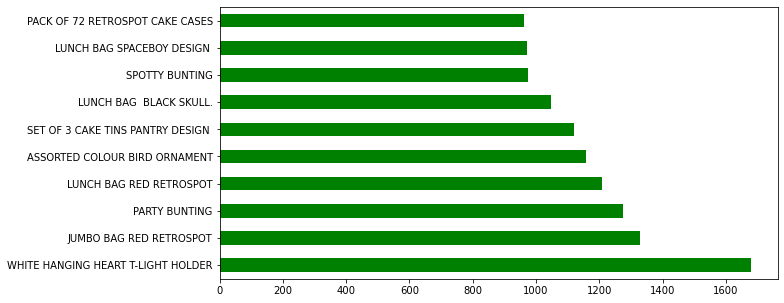

In [44]:
dataset['Description'].value_counts()[:10].plot(kind='barh',color='green',figsize=(10,5))

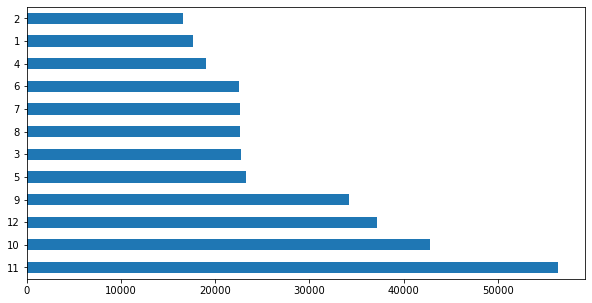

In [45]:
dataset['Month'].value_counts().plot(kind='barh',figsize=(10,5))

BY THIS, WE CAN TELL THAT THE MONTH NOVEMBER HAD THE MAXIMUM SALES AND FEBRUARY HAD THE MINIMUM SALES

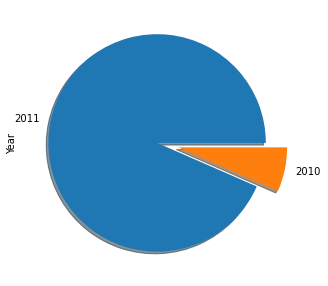

In [46]:
dataset['Year'].value_counts().plot(kind='pie',explode=(0,0.2),shadow=True,figsize=(10,5))

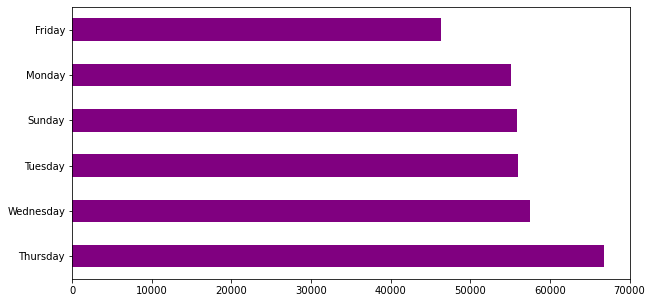

In [47]:
dataset['Weekday'].value_counts().plot(kind='barh',color='purple',figsize=(10,5))

BY THIS, WE CAN CONFIGURE THAT SHOP USED TO BE CLOSED ON SATURDAYS AND ALSO THE LOWEST SALES USED TO HAPPEN ON FRIDAYS

# CUSTOMER SEGMENTATION

In [48]:
dataset.groupby(['InvoiceNo','Description']).size()[:50]

InvoiceNo  Description                        
536365     CREAM CUPID HEARTS COAT HANGER         1
           GLASS STAR FROSTED T-LIGHT HOLDER      1
           KNITTED UNION FLAG HOT WATER BOTTLE    1
           RED WOOLLY HOTTIE WHITE HEART.         1
           WHITE HANGING HEART T-LIGHT HOLDER     1
           WHITE METAL LANTERN                    1
536366     HAND WARMER RED POLKA DOT              1
           HAND WARMER UNION JACK                 1
536367     BOX OF 6 ASSORTED COLOUR TEASPOONS     1
           BOX OF VINTAGE JIGSAW BLOCKS           1
           FELTCRAFT PRINCESS CHARLOTTE DOLL      1
           HOME BUILDING BLOCK WORD               1
           IVORY KNITTED MUG COSY                 1
           LOVE BUILDING BLOCK WORD               1
           POPPY'S PLAYHOUSE BEDROOM              1
           POPPY'S PLAYHOUSE KITCHEN              1
536368     BLUE COAT RACK PARIS FASHION           1
           JAM MAKING SET WITH JARS               1
           RED CO

In [49]:
dataset.groupby(['CustomerID','Description']).size()

CustomerID  Description                      
12347.0     3D DOG PICTURE PLAYING CARDS         3
            3D SHEET OF CAT STICKERS             1
            3D SHEET OF DOG STICKERS             1
            60 TEATIME FAIRY CAKE CASES          3
            72 SWEETHEART FAIRY CAKE CASES       3
                                                ..
18287.0     SMALL YELLOW BABUSHKA NOTEBOOK       1
            STAR T-LIGHT HOLDER WILLIE WINKIE    1
            STRAWBERRY CERAMIC TRINKET BOX       1
            SWISS CHALET TREE DECORATION         2
            TREE T-LIGHT HOLDER WILLIE WINKIE    1
Length: 232548, dtype: int64

## 1.Products Ordered

In [50]:
def encode_column(column):
    if column > 0:
        return 1
    if column <= 0:
        return 0


def aggregate_by_ordered_quantity(dataframe, column_list):

    aggregated_dataframe = (dataframe
                            .groupby(column_list)
                            .Quantity.count()
                            .reset_index())

    aggregated_dataframe["Products_ordered"] = (aggregated_dataframe
                                                 .Quantity
                                                 .apply(encode_column))

    final_dataframe = (aggregated_dataframe
                       .groupby(column_list[0])
                       .Products_ordered.sum()
                       .reset_index())

    return final_dataframe

In [51]:
customers = aggregate_by_ordered_quantity(dataset, ['CustomerID','Description'])

In [52]:
customers.head()

,CustomerID,Products_ordered
0,12347.0,96
1,12348.0,6
2,12349.0,57
3,12350.0,16
4,12352.0,49


## 2.Total Spending

CREATING A SALES COLUMN WHICH IS PRODUCT OF QUANTITY AND UNIT PRICE OF ITEM 

In [53]:
dataset['Sales'] = dataset['Quantity']*dataset['UnitPrice']

In [54]:
dataset.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Transformed_Quantity,Log_Transformed_UnitPrice,Normalized_Quantity,Normalized_UnitPrice,Standardized_Quantity,Standardized_UnitPrice,Date,Month,Year,Weekday,Time,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.945910,1.266948,0.20,0.341735,-0.219014,0.239846,1,12,2010,Wednesday,08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.454350,-0.219014,0.788737,1,12,2010,Wednesday,08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2.197225,1.321756,0.28,0.368548,0.076431,0.370534,1,12,2010,Wednesday,08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.454350,-0.219014,0.788737,1,12,2010,Wednesday,08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.454350,-0.219014,0.788737,1,12,2010,Wednesday,08:26:00,20.34
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,1.945910,1.658228,0.20,0.569647,-0.219014,1.350697,1,12,2010,Wednesday,08:26:00,25.50
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,1.945910,1.047319,0.20,0.247888,-0.219014,-0.217563,1,12,2010,Wednesday,08:28:00,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,1.945910,1.047319,0.20,0.247888,-0.219014,-0.217563,1,12,2010,Wednesday,08:28:00,11.10
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,12/1/2010 8:34,2.10,13047.0,United Kingdom,1.945910,1.131402,0.20,0.281405,-0.219014,-0.054203,1,12,2010,Wednesday,08:34:00,12.60
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,12/1/2010 8:34,2.10,13047.0,United Kingdom,1.945910,1.131402,0.20,0.281405,-0.219014,-0.054203,1,12,2010,Wednesday,08:34:00,12.60


In [55]:
Customer_total_spending = (dataset
                           .groupby("CustomerID")
                           .Sales
                           .sum()
                           .reset_index())

Customer_total_spending.rename(columns = {"Sales" : "Total_spending"},
                               inplace = True)

In [56]:
customers = pd.merge(customers,Customer_total_spending,on='CustomerID')

In [57]:
print("The number of customers from the existing customer base:", customers.shape[0])

The number of customers from the existing customer base: 4190


In [58]:
customers.head(10)

,CustomerID,Products_ordered,Total_spending
0,12347.0,96,3314.73
1,12348.0,6,90.20
2,12349.0,57,984.15
3,12350.0,16,294.40
4,12352.0,49,1130.94
5,12353.0,2,29.30
6,12354.0,40,682.69
7,12355.0,9,219.00
8,12356.0,33,1086.56
9,12357.0,95,3195.41


# Scaling using Log1p Transform

In [59]:
def apply_log1p_transformation(dataframe, column):
    
    dataframe["log_" + column] = np.log1p(dataframe[column])
    return dataframe["log_" + column]

### 1.Products Ordered

In [60]:
apply_log1p_transformation(customers, "Products_ordered")

0       4.574711
1       1.945910
2       4.060443
3       2.833213
4       3.912023
          ...   
4185    2.197225
4186    1.791759
4187    2.197225
4188    5.594711
4189    3.850148
Name: log_Products_ordered, Length: 4190, dtype: float64

### 2.Total Spending

In [61]:
apply_log1p_transformation(customers, "Total_spending")

0       8.106433
1       4.513055
2       6.892794
3       5.688330
4       7.031688
          ...   
4185    4.927254
4186    3.869533
4187    4.737338
4188    7.627048
4189    6.868765
Name: log_Total_spending, Length: 4190, dtype: float64

In [62]:
customers.head(10)

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending
0,12347.0,96,3314.73,4.574711,8.106433
1,12348.0,6,90.20,1.945910,4.513055
2,12349.0,57,984.15,4.060443,6.892794
3,12350.0,16,294.40,2.833213,5.688330
4,12352.0,49,1130.94,3.912023,7.031688
5,12353.0,2,29.30,1.098612,3.411148
6,12354.0,40,682.69,3.713572,6.527505
7,12355.0,9,219.00,2.302585,5.393628
8,12356.0,33,1086.56,3.526361,6.991692
9,12357.0,95,3195.41,4.564348,8.069784


## Feature Selection

In [63]:
customers.iloc[:,3:]

,log_Products_ordered,log_Total_spending
0,4.574711,8.106433
1,1.945910,4.513055
2,4.060443,6.892794
3,2.833213,5.688330
4,3.912023,7.031688
...,...,...
4185,2.197225,4.927254
4186,1.791759,3.869533
4187,2.197225,4.737338
4188,5.594711,7.627048


# K-Means Clustering

In [64]:
from sklearn.cluster import KMeans

In [65]:
kmeans_model = KMeans(init='k-means++', 
                      max_iter=500, 
                      random_state=42)

In [66]:
kmeans_model.fit(customers.iloc[:,3:])

KMeans(max_iter=500, random_state=42)

### Intracluster distance

In [67]:
print("Intracluster distance of the model is:", kmeans_model.inertia_)

Intracluster distance of the model is: 1197.7636551526552


THIS DISTANCE NEEDS TO BE MINIMIZED BY FINDING OPTIMAL HYPERPARAMETER

## Hyperparameter Tuning

In [68]:
def make_list_of_K(K, dataframe):
    
    cluster_values = list(range(1, K+1))
    inertia_values=[]
    
    for c in cluster_values:
        model = KMeans(
            n_clusters = c, 
            init='k-means++', 
            max_iter=500, 
            random_state=42)
        model.fit(dataframe)
        inertia_values.append(model.inertia_)
    
    return inertia_values

In [69]:
# checking for k values between 1 and 15

results = make_list_of_K(15, customers.iloc[:, 3:])

In [70]:
k_values_distances = pd.DataFrame({"clusters": list(range(1, 16)),
                                   "Intracluster distances": results})

In [71]:
print(k_values_distances)

    clusters  Intracluster distances
0          1            11756.716152
1          2             4791.158640
2          3             2965.739812
3          4             2211.293062
4          5             1810.827361
5          6             1565.869474
6          7             1354.865564
7          8             1197.763655
8          9             1054.147008
9         10              957.776268
10        11              873.939727
11        12              800.004846
12        13              745.313816
13        14              701.366181
14        15              660.793063


No handles with labels found to put in legend.


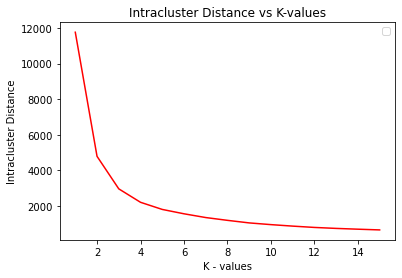

In [72]:
plt.plot(k_values_distances['clusters'],k_values_distances['Intracluster distances'],color='red')
plt.xlabel('K - values')
plt.ylabel('Intracluster Distance')
plt.title('Intracluster Distance vs K-values')
plt.legend()
plt.show()

#### This tells us that after k=4 the descent gets stabilized so the optimal k is 4

## Updating model with optimal k

In [73]:
updated_kmeans_model = KMeans(n_clusters = 4, 
                              init='k-means++', 
                              max_iter=500, 
                              random_state=42)

In [74]:
updated_kmeans_model.fit_predict(customers.iloc[:,3:])

array([0, 2, 3, ..., 2, 0, 3])

### Adding cluster centers

In [75]:
# create cluster centers and actual data arrays
cluster_centers = updated_kmeans_model.cluster_centers_
actual_data = np.expm1(cluster_centers)
add_points = np.append(actual_data, cluster_centers, axis=1)
add_points

array([[1.26484719e+02, 2.55798836e+03, 4.84799651e+00, 7.84736729e+00],
       [1.76448543e+01, 2.54400467e+02, 2.92557020e+00, 5.54283277e+00],
       [4.59997756e+00, 7.60843242e+01, 1.72276259e+00, 4.34489994e+00],
       [4.78203788e+01, 7.16031113e+02, 3.88814782e+00, 6.57511923e+00]])

In [76]:
# add labels to customers dataframe and add_points array
add_points = np.append(add_points, [[0], [1], [2], [3]], axis=1)
customers["clusters"] = updated_kmeans_model.labels_

In [77]:
# create centers dataframe from add_points
centers_df = pd.DataFrame(data=add_points, columns=["Products_ordered",
                                                    "Total_spending",
                                                    "log_Products_ordered",
                                                    "log_Total_spending",
                                                    "clusters"])
centers_df.head()

,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters
0,126.484719,2557.988360,4.847997,7.847367,0.0
1,17.644854,254.400467,2.925570,5.542833,1.0
2,4.599978,76.084324,1.722763,4.344900,2.0
3,47.820379,716.031113,3.888148,6.575119,3.0


In [78]:
centers_df["clusters"] = centers_df["clusters"].astype("int")
centers_df.head()

,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters
0,126.484719,2557.988360,4.847997,7.847367,0
1,17.644854,254.400467,2.925570,5.542833,1
2,4.599978,76.084324,1.722763,4.344900,2
3,47.820379,716.031113,3.888148,6.575119,3


In [79]:
customers.head(10)

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters
0,12347.0,96,3314.73,4.574711,8.106433,0
1,12348.0,6,90.20,1.945910,4.513055,2
2,12349.0,57,984.15,4.060443,6.892794,3
3,12350.0,16,294.40,2.833213,5.688330,1
4,12352.0,49,1130.94,3.912023,7.031688,3
5,12353.0,2,29.30,1.098612,3.411148,2
6,12354.0,40,682.69,3.713572,6.527505,3
7,12355.0,9,219.00,2.302585,5.393628,1
8,12356.0,33,1086.56,3.526361,6.991692,3
9,12357.0,95,3195.41,4.564348,8.069784,0


## Cluster visualization

In [80]:
customers["Cluster_name"] = customers["clusters"].astype(str)

In [81]:
customers.head(10)

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name
0,12347.0,96,3314.73,4.574711,8.106433,0,0
1,12348.0,6,90.20,1.945910,4.513055,2,2
2,12349.0,57,984.15,4.060443,6.892794,3,3
3,12350.0,16,294.40,2.833213,5.688330,1,1
4,12352.0,49,1130.94,3.912023,7.031688,3,3
5,12353.0,2,29.30,1.098612,3.411148,2,2
6,12354.0,40,682.69,3.713572,6.527505,3,3
7,12355.0,9,219.00,2.302585,5.393628,1,1
8,12356.0,33,1086.56,3.526361,6.991692,3,3
9,12357.0,95,3195.41,4.564348,8.069784,0,0


In [82]:
Magnitude_df = pd.DataFrame(
    customers.Cluster_name.value_counts().reset_index())

In [83]:
Magnitude_df.rename(columns={"index": "Customer Groups",
                               "Cluster_name": "Customer Group Magnitude"},
                      inplace=True)

In [84]:
Magnitude_df

,Customer Groups,Customer Group Magnitude
0,3,1372
1,1,1317
2,0,862
3,2,639


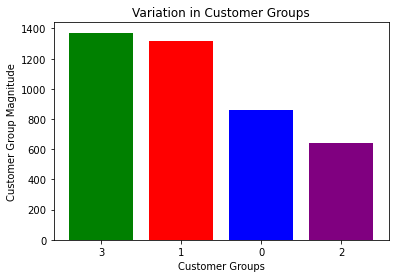

In [85]:
plt.bar(Magnitude_df['Customer Groups'],Magnitude_df['Customer Group Magnitude'],color=['green','red','blue','purple'])
plt.xlabel('Customer Groups')
plt.ylabel('Customer Group Magnitude')
plt.title('Variation in Customer Groups')
plt.show()

# CUSTOMER PROFILING

### Number of products bought by each customerID

In [86]:
customers.iloc[:,:2]

,CustomerID,Products_ordered
0,12347.0,96
1,12348.0,6
2,12349.0,57
3,12350.0,16
4,12352.0,49
...,...,...
4185,18280.0,8
4186,18281.0,5
4187,18282.0,8
4188,18283.0,268


### Total bill of each customerID

In [87]:
customers[['CustomerID','Total_spending']]

,CustomerID,Total_spending
0,12347.0,3314.73
1,12348.0,90.20
2,12349.0,984.15
3,12350.0,294.40
4,12352.0,1130.94
...,...,...
4185,18280.0,137.00
4186,18281.0,46.92
4187,18282.0,113.13
4188,18283.0,2051.98


### Customers Grouping based on Customer Segmentation

#### Group 0

In [88]:
customers[customers['clusters']==0]

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name
0,12347.0,96,3314.73,4.574711,8.106433,0,0
9,12357.0,95,3195.41,4.564348,8.069784,0,0
11,12359.0,157,3224.13,5.062595,8.078729,0,0
12,12360.0,97,1843.16,4.584967,7.519779,0,0
14,12362.0,172,4098.94,5.153292,8.318728,0,0
...,...,...,...,...,...,...,...
4163,18245.0,139,2266.43,4.941642,7.726402,0,0
4170,18257.0,86,1997.26,4.465908,7.600032,0,0
4172,18260.0,76,2082.31,4.343805,7.641713,0,0
4179,18272.0,90,2794.96,4.510860,7.935931,0,0


#### Group 1

In [89]:
customers[customers['clusters']==1]

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name
3,12350.0,16,294.40,2.833213,5.688330,1,1
7,12355.0,9,219.00,2.302585,5.393628,1,1
10,12358.0,9,878.22,2.302585,6.779035,1,1
13,12361.0,9,174.90,2.302585,5.169916,1,1
15,12363.0,19,484.50,2.995732,6.185179,1,1
...,...,...,...,...,...,...,...
4174,18262.0,13,149.48,2.639057,5.013830,1,1
4178,18270.0,10,244.90,2.397895,5.504925,1,1
4181,18274.0,10,163.17,2.397895,5.100902,1,1
4182,18276.0,12,213.46,2.564949,5.368123,1,1


#### Group 2

In [90]:
customers[customers['clusters']==2]

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name
1,12348.0,6,90.20,1.945910,4.513055,2,2
5,12353.0,2,29.30,1.098612,3.411148,2,2
18,12367.0,9,138.30,2.302585,4.936630,2,2
42,12401.0,2,32.85,1.098612,3.521939,2,2
44,12403.0,2,92.90,1.098612,4.542230,2,2
...,...,...,...,...,...,...,...
4180,18273.0,1,102.00,0.693147,4.634729,2,2
4183,18277.0,8,110.38,2.197225,4.712948,2,2
4185,18280.0,8,137.00,2.197225,4.927254,2,2
4186,18281.0,5,46.92,1.791759,3.869533,2,2


#### Group 3

In [91]:
customers[customers['clusters']==3]

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name
2,12349.0,57,984.15,4.060443,6.892794,3,3
4,12352.0,49,1130.94,3.912023,7.031688,3,3
6,12354.0,40,682.69,3.713572,6.527505,3,3
8,12356.0,33,1086.56,3.526361,6.991692,3,3
16,12364.0,67,1106.28,4.219508,7.009662,3,3
...,...,...,...,...,...,...,...
4168,18252.0,81,385.67,4.406719,5.957572,3,3
4171,18259.0,26,2203.60,3.295837,7.698301,3,3
4175,18263.0,49,1042.40,3.912023,6.950240,3,3
4176,18265.0,34,609.11,3.555348,6.413639,3,3


### Frequency of customers visiting the store

In [92]:
frequency_of_customer = dataset.groupby('CustomerID')['InvoiceNo'].nunique()

In [93]:
frequency_of_customer

CustomerID
12347.0     7
12348.0     3
12349.0     1
12350.0     1
12352.0     7
           ..
18280.0     1
18281.0     1
18282.0     2
18283.0    16
18287.0     3
Name: InvoiceNo, Length: 4190, dtype: int64

In [94]:
customers = pd.merge(customers,frequency_of_customer,on='CustomerID')

In [95]:
customers.head()

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name,InvoiceNo
0,12347.0,96,3314.73,4.574711,8.106433,0,0,7
1,12348.0,6,90.20,1.945910,4.513055,2,2,3
2,12349.0,57,984.15,4.060443,6.892794,3,3,1
3,12350.0,16,294.40,2.833213,5.688330,1,1,1
4,12352.0,49,1130.94,3.912023,7.031688,3,3,7


In [96]:
customers.rename(columns = {'InvoiceNo':'Frequency_of_customer'}, inplace = True)

In [97]:
customers.head()

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name,Frequency_of_customer
0,12347.0,96,3314.73,4.574711,8.106433,0,0,7
1,12348.0,6,90.20,1.945910,4.513055,2,2,3
2,12349.0,57,984.15,4.060443,6.892794,3,3,1
3,12350.0,16,294.40,2.833213,5.688330,1,1,1
4,12352.0,49,1130.94,3.912023,7.031688,3,3,7


### Customer visit number per year

In [98]:
new_dataset = dataset[['InvoiceNo','CustomerID','Year','Month']]

In [99]:
new_dataset.head(10)

,InvoiceNo,CustomerID,Year,Month
0,536365,17850.0,2010,12
1,536365,17850.0,2010,12
2,536365,17850.0,2010,12
3,536365,17850.0,2010,12
4,536365,17850.0,2010,12
6,536365,17850.0,2010,12
7,536366,17850.0,2010,12
8,536366,17850.0,2010,12
10,536367,13047.0,2010,12
11,536367,13047.0,2010,12


In [100]:
new_dataset.drop_duplicates(inplace=True)

<ipython-input-100-c745c8868dca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset.drop_duplicates(inplace=True)


In [101]:
new_dataset.head(10)

,InvoiceNo,CustomerID,Year,Month
0,536365,17850.0,2010,12
7,536366,17850.0,2010,12
10,536367,13047.0,2010,12
21,536368,13047.0,2010,12
25,536369,13047.0,2010,12
26,536370,12583.0,2010,12
47,536372,17850.0,2010,12
49,536373,17850.0,2010,12
66,536375,17850.0,2010,12
84,536377,17850.0,2010,12


In [102]:
new_dataset = new_dataset.reset_index(drop=True)

In [103]:
new_dataset['Visit_no_yr'] = new_dataset.groupby(['CustomerID', 'Year']).cumcount()+1

In [104]:
new_dataset

,InvoiceNo,CustomerID,Year,Month,Visit_no_yr
0,536365,17850.0,2010,12,1
1,536366,17850.0,2010,12,2
2,536367,13047.0,2010,12,1
3,536368,13047.0,2010,12,2
4,536369,13047.0,2010,12,3
...,...,...,...,...,...
16815,581581,17581.0,2011,12,21
16816,581582,17581.0,2011,12,22
16817,581585,15804.0,2011,12,13
16818,581586,13113.0,2011,12,23


### Customer visit number per month 

In [105]:
new_dataset['Visit_no_month'] = new_dataset.groupby(['CustomerID', 'Month']).cumcount()+1

In [106]:
new_dataset

,InvoiceNo,CustomerID,Year,Month,Visit_no_yr,Visit_no_month
0,536365,17850.0,2010,12,1,1
1,536366,17850.0,2010,12,2,2
2,536367,13047.0,2010,12,1,1
3,536368,13047.0,2010,12,2,2
4,536369,13047.0,2010,12,3,3
...,...,...,...,...,...,...
16815,581581,17581.0,2011,12,21,4
16816,581582,17581.0,2011,12,22,5
16817,581585,15804.0,2011,12,13,1
16818,581586,13113.0,2011,12,23,2


# ITEM RECOMMENDATION SYSTEM USING WORD2VEC

In [107]:
no_of_customers = list(dataset["CustomerID"].unique())

In [108]:
len(no_of_customers)

4190

In [109]:
print('The number of unique customers are :', len(no_of_customers))

The number of unique customers are : 4190


#### Typecasting

In [110]:
dataset['StockCode']= dataset['StockCode'].astype(str)

#### Shuffling the customers and then using 90% of it for creating the model & then finally splitting into train and validation dataset

In [111]:
import random

random.shuffle(no_of_customers)

customers_train = [no_of_customers[i] for i in range(round(0.9*len(no_of_customers)))]

train_dataset = dataset[dataset['CustomerID'].isin(customers_train)]
validation_dataset = dataset[~dataset['CustomerID'].isin(customers_train)]

#### List of purchases made by the customer

In [112]:
from tqdm import tqdm

##### 1.Training Dataset

In [113]:
purchases_train = []

for i in tqdm(customers_train):
    temp = list(train_dataset[train_dataset["CustomerID"] == i]["StockCode"])
    purchases_train.append(temp)

100%|████████████████████████████████████████████████████████████████████████████| 3771/3771 [00:03<00:00, 1239.47it/s]


##### 2.Validation Dataset

In [114]:
purchases_val = []

for i in tqdm(validation_dataset['CustomerID'].unique()):
    temp = list(validation_dataset[validation_dataset["CustomerID"] == i]["StockCode"])
    purchases_val.append(temp)

100%|██████████████████████████████████████████████████████████████████████████████| 419/419 [00:00<00:00, 1732.45it/s]


In [115]:
from gensim.models import Word2Vec

#### Creating and training the word2vec model

In [116]:
model = Word2Vec(window = 10, sg = 1, hs = 0,
                 negative = 10,
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

model.build_vocab(purchases_train, progress_per=200)

model.train(purchases_train, total_examples = model.corpus_count, 
            epochs=10, report_delay=1)

(3060174, 3092640)

In [117]:
model.init_sims(replace=True)

In [118]:
print(model)

Word2Vec(vocab=2884, size=100, alpha=0.03)


#### Each vector of  2891 unique vocabulary words has the size of 100

In [119]:
X = model[model.wv.vocab]

X.shape

<ipython-input-119-9ed1be326c71>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]


(2884, 100)

#### Visual Representation of similar products

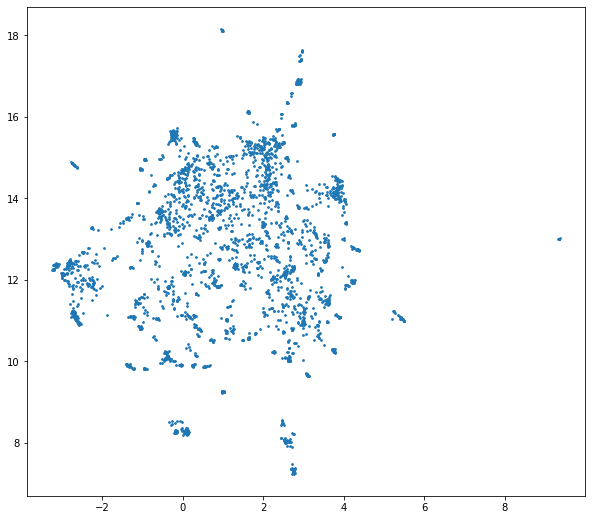

In [120]:
import umap.umap_ as umap

cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(X)

plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

#### Creating a product Dictionary

In [121]:
products = train_dataset[["StockCode", "Description"]]

products.drop_duplicates(inplace=True, subset='StockCode', keep="last")

products_dict = products.groupby('StockCode')['Description'].apply(list).to_dict()

<ipython-input-121-1db94d506852>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products.drop_duplicates(inplace=True, subset='StockCode', keep="last")


In [122]:
products_dict['22748']

["POPPY'S PLAYHOUSE KITCHEN"]

In [123]:
products_dict['84029G']

['KNITTED UNION FLAG HOT WATER BOTTLE']

#### Recommendation Function based on single product vector & will return 6 similar products

In [124]:
def similar_products(v, n = 6):
    ms = model.similar_by_vector(v, topn= n+1)[1:]
    new_ms = []
    for j in ms:
        pair = (products_dict[j[0]][0], j[1])
        new_ms.append(pair)
        
    return new_ms        

In [125]:
similar_products(model['84029G'])

<ipython-input-125-1006b845b914>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  similar_products(model['84029G'])
<ipython-input-124-0316710098f7>:2: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  ms = model.similar_by_vector(v, topn= n+1)[1:]


[('RED WOOLLY HOTTIE WHITE HEART.', 0.7720696926116943),
 ('WHITE SKULL HOT WATER BOTTLE ', 0.6833576560020447),
 ('RETROSPOT HEART HOT WATER BOTTLE', 0.6711151003837585),
 ('SCOTTIE DOG HOT WATER BOTTLE', 0.6541935801506042),
 ('CHOCOLATE HOT WATER BOTTLE', 0.6533889770507812),
 ('ENGLISH ROSE HOT WATER BOTTLE', 0.642096996307373)]

In [126]:
similar_products(model['90019A'])

<ipython-input-126-99aba269da44>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  similar_products(model['90019A'])
<ipython-input-124-0316710098f7>:2: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  ms = model.similar_by_vector(v, topn= n+1)[1:]


[('ANT COPPER RED BOUDICCA BRACELET', 0.758692741394043),
 ('SILVER M.O.P ORBIT DROP EARRINGS', 0.7436583638191223),
 ('PINK BOUDICCA LARGE BRACELET', 0.742901623249054),
 ('GREEN HEART OF GLASS BRACELET', 0.7329078316688538),
 ('BLACK VINTAGE  CRYSTAL EARRINGS', 0.7324577569961548),
 ('DROP DIAMANTE EARRINGS PURPLE', 0.7213557958602905)]

#### Recommendation Function based on average of products vector bought by user & will return 6 similar products

In [127]:
def aggregate_vectors(products):
    product_vec = []
    for i in products:
        try:
            product_vec.append(model[i])
        except KeyError:
            continue
        
    return np.mean(product_vec, axis=0)

In [128]:
len(purchases_val[0])

146

In [129]:
aggregate_vectors(purchases_val[0]).shape

<ipython-input-127-eb33a9fb5789>:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  product_vec.append(model[i])


(100,)

In [130]:
similar_products(aggregate_vectors(purchases_val[0]))

<ipython-input-127-eb33a9fb5789>:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  product_vec.append(model[i])
<ipython-input-124-0316710098f7>:2: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  ms = model.similar_by_vector(v, topn= n+1)[1:]


[('JAM MAKING SET PRINTED', 0.6722932457923889),
 ('SET OF TEA COFFEE SUGAR TINS PANTRY', 0.6711375713348389),
 ('PARTY BUNTING', 0.6659960150718689),
 ('SPOTTY BUNTING', 0.6654152870178223),
 ('SET OF 3 REGENCY CAKE TINS', 0.6643664836883545),
 ('JAM MAKING SET WITH JARS', 0.6628013253211975)]

In [131]:
similar_products(aggregate_vectors(purchases_val[0][-5:]))

<ipython-input-127-eb33a9fb5789>:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  product_vec.append(model[i])
<ipython-input-124-0316710098f7>:2: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  ms = model.similar_by_vector(v, topn= n+1)[1:]


[('PACK OF SIX LED TEA LIGHTS', 0.6905252933502197),
 ("3 RAFFIA RIBBONS 50'S CHRISTMAS ", 0.6896857619285583),
 ('SET OF 6 RIBBONS VINTAGE CHRISTMAS', 0.6806453466415405),
 ('TRADITIONAL CHRISTMAS RIBBONS', 0.6752421259880066),
 ('SCANDINAVIAN REDS RIBBONS', 0.6646302938461304),
 ('SET OF 20 VINTAGE CHRISTMAS NAPKINS', 0.6634624600410461)]

# CHURN PREDICTION

In [132]:
dataset[['Date','Month','Year']]

,Date,Month,Year
0,1,12,2010
1,1,12,2010
2,1,12,2010
3,1,12,2010
4,1,12,2010
...,...,...,...
541904,9,12,2011
541905,9,12,2011
541906,9,12,2011
541907,9,12,2011


In [133]:
dataset['Month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

## Splitting the dataset 

### Initial Dataset consists data till end of July 2011

In [134]:
initial_dataset = dataset[((dataset['Month']==12) & (dataset['Year']==2010)) | 
                          ((dataset['Month']==1) & (dataset['Year']==2011)) |
                          ((dataset['Month']==2) & (dataset['Year']==2011)) |
                          ((dataset['Month']==3) & (dataset['Year']==2011)) |
                          ((dataset['Month']==4) & (dataset['Year']==2011)) |
                          ((dataset['Month']==5) & (dataset['Year']==2011)) |
                          ((dataset['Month']==6) & (dataset['Year']==2011)) |
                          ((dataset['Month']==7) & (dataset['Year']==2011))]

In [135]:
initial_dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Transformed_Quantity,Log_Transformed_UnitPrice,Normalized_Quantity,Normalized_UnitPrice,Standardized_Quantity,Standardized_UnitPrice,Date,Month,Year,Weekday,Time,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.945910,1.266948,0.20,0.341735,-0.219014,0.239846,1,12,2010,Wednesday,08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.454350,-0.219014,0.788737,1,12,2010,Wednesday,08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2.197225,1.321756,0.28,0.368548,0.076431,0.370534,1,12,2010,Wednesday,08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.454350,-0.219014,0.788737,1,12,2010,Wednesday,08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.454350,-0.219014,0.788737,1,12,2010,Wednesday,08:26:00,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285415,561903,21901,"KEY FOB , BACK DOOR",24,7/31/2011 16:04,0.65,17162.0,United Kingdom,3.218876,0.500775,0.92,0.087009,2.439994,-1.001693,31,7,2011,Sunday,16:04:00,15.60
285416,561903,21900,"KEY FOB , SHED",24,7/31/2011 16:04,0.65,17162.0,United Kingdom,3.218876,0.500775,0.92,0.087009,2.439994,-1.001693,31,7,2011,Sunday,16:04:00,15.60
285418,561903,85152,HAND OVER THE CHOCOLATE SIGN,12,7/31/2011 16:04,2.10,17162.0,United Kingdom,2.564949,1.131402,0.44,0.281405,0.667322,-0.054203,31,7,2011,Sunday,16:04:00,25.20
285419,561903,82600,NO SINGING METAL SIGN,12,7/31/2011 16:04,2.10,17162.0,United Kingdom,2.564949,1.131402,0.44,0.281405,0.667322,-0.054203,31,7,2011,Sunday,16:04:00,25.20


### Final Dataset consists data from start of August 2011 till end

In [136]:
final_dataset = dataset[((dataset['Month']==8) & (dataset['Year']==2011)) |
                        ((dataset['Month']==9) & (dataset['Year']==2011)) | 
                        ((dataset['Month']==10) & (dataset['Year']==2011)) |
                        ((dataset['Month']==11) & (dataset['Year']==2011)) |
                        ((dataset['Month']==12) & (dataset['Year']==2011))]

In [137]:
final_dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Transformed_Quantity,Log_Transformed_UnitPrice,Normalized_Quantity,Normalized_UnitPrice,Standardized_Quantity,Standardized_UnitPrice,Date,Month,Year,Weekday,Time,Sales
285423,561905,21385,IVORY HANGING DECORATION HEART,24,8/1/2011 9:31,0.85,14947.0,United Kingdom,3.218876,0.615186,0.92,0.113822,2.439994,-0.871005,1,8,2011,Monday,09:31:00,20.40
285424,561905,84970L,SINGLE HEART ZINC T-LIGHT HOLDER,12,8/1/2011 9:31,0.95,14947.0,United Kingdom,2.564949,0.667829,0.44,0.127229,0.667322,-0.805661,1,8,2011,Monday,09:31:00,11.40
285425,561905,84970S,HANGING HEART ZINC T-LIGHT HOLDER,12,8/1/2011 9:31,0.85,14947.0,United Kingdom,2.564949,0.615186,0.44,0.113822,0.667322,-0.871005,1,8,2011,Monday,09:31:00,10.20
285426,561905,84978,HANGING HEART JAR T-LIGHT HOLDER,12,8/1/2011 9:31,1.25,14947.0,United Kingdom,2.564949,0.810930,0.44,0.167449,0.667322,-0.609628,1,8,2011,Monday,09:31:00,15.00
285427,561905,21754,HOME BUILDING BLOCK WORD,3,8/1/2011 9:31,5.95,14947.0,United Kingdom,1.386294,1.938742,0.08,0.797560,-0.662182,2.461548,1,8,2011,Monday,09:31:00,17.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,2.564949,0.615186,0.44,0.113822,0.667322,-0.871005,9,12,2011,Friday,12:50:00,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,1.945910,1.131402,0.20,0.281405,-0.219014,-0.054203,9,12,2011,Friday,12:50:00,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,1.609438,1.638997,0.12,0.556241,-0.514460,1.285353,9,12,2011,Friday,12:50:00,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,1.609438,1.638997,0.12,0.556241,-0.514460,1.285353,9,12,2011,Friday,12:50:00,16.60


#### Here, we are finding the frequency of  each customers during start of December 2010 to end of July 2011 

In [138]:
initial_frequency = initial_dataset.groupby('CustomerID')['InvoiceNo'].nunique()

In [139]:
initial_frequency

CustomerID
12347.0    4
12348.0    3
12350.0    1
12352.0    4
12353.0    1
          ..
18273.0    1
18280.0    1
18281.0    1
18283.0    9
18287.0    1
Name: InvoiceNo, Length: 3022, dtype: int64

In [140]:
initial_frequency_table = pd.DataFrame({'CustomerID':initial_dataset['CustomerID'].unique()})

In [141]:
initial_frequency_table = initial_frequency_table.sort_values('CustomerID').reset_index()
del initial_frequency_table['index']

In [142]:
initial_frequency_table

,CustomerID
0,12347.0
1,12348.0
2,12350.0
3,12352.0
4,12353.0
...,...
3017,18273.0
3018,18280.0
3019,18281.0
3020,18283.0


In [143]:
initial_frequency_table = pd.merge(initial_frequency_table,initial_frequency,on='CustomerID')

In [144]:
initial_frequency_table.head(10)

,CustomerID,InvoiceNo
0,12347.0,4
1,12348.0,3
2,12350.0,1
3,12352.0,4
4,12353.0,1
5,12354.0,1
6,12355.0,1
7,12356.0,2
8,12358.0,1
9,12359.0,3


In [145]:
initial_frequency_table.rename(columns = {'InvoiceNo':'Initial_frequency'}, inplace = True)

In [146]:
initial_frequency_table

,CustomerID,Initial_frequency
0,12347.0,4
1,12348.0,3
2,12350.0,1
3,12352.0,4
4,12353.0,1
...,...,...
3017,18273.0,1
3018,18280.0,1
3019,18281.0,1
3020,18283.0,9


In [147]:
initial_frequency_table['Initial_frequency'].describe()

count    3022.000000
mean        3.034083
std         4.699563
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       108.000000
Name: Initial_frequency, dtype: float64

#### Here, we are finding the frequency of  each customers during start of August 2011 to end of dataset 

In [148]:
final_frequency = final_dataset.groupby('CustomerID')['InvoiceNo'].nunique()

In [149]:
final_frequency

CustomerID
12347.0    3
12349.0    1
12352.0    3
12357.0    1
12358.0    1
          ..
18277.0    1
18278.0    1
18282.0    2
18283.0    7
18287.0    2
Name: InvoiceNo, Length: 3070, dtype: int64

In [150]:
final_frequency_table = pd.DataFrame({'CustomerID':final_dataset['CustomerID'].unique()})

In [151]:
final_frequency_table = final_frequency_table.sort_values('CustomerID').reset_index()
del final_frequency_table['index']

In [152]:
final_frequency_table

,CustomerID
0,12347.0
1,12349.0
2,12352.0
3,12357.0
4,12358.0
...,...
3065,18277.0
3066,18278.0
3067,18282.0
3068,18283.0


In [153]:
final_frequency_table = pd.merge(final_frequency_table,final_frequency,on='CustomerID')

In [154]:
final_frequency_table.rename(columns = {'InvoiceNo':'Final_frequency'}, inplace = True)

In [155]:
final_frequency_table

,CustomerID,Final_frequency
0,12347.0,3
1,12349.0,1
2,12352.0,3
3,12357.0,1
4,12358.0,1
...,...,...
3065,18277.0,1
3066,18278.0,1
3067,18282.0,2
3068,18283.0,7


In [156]:
final_frequency_table['Final_frequency'].describe()

count    3070.000000
mean        2.492182
std         3.514125
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       101.000000
Name: Final_frequency, dtype: float64

#### Now, we need to check those customers who used to come before but have not come in recent 4 months

In [157]:
a = np.array(initial_frequency_table['CustomerID'])
b = np.array(final_frequency_table['CustomerID'])

##### These are churned customers

In [158]:
c = np.setdiff1d(a,b)
print(c)

[12348. 12350. 12353. ... 18269. 18280. 18281.]


In [159]:
len(c)

1120

##### These are unchurned customers

In [160]:
d = np.intersect1d(a,b)
print(d)

[12347. 12352. 12358. ... 18273. 18283. 18287.]


In [161]:
len(d)

1902

In [162]:
e = np.setdiff1d(b,a)
print(e)

[12349. 12357. 12364. ... 18277. 18278. 18282.]


In [163]:
len(e)

1168

In [164]:
lis1 = []
for i in range(len(c)):
    lis1.append('CHURN')

In [165]:
lis2 = []
for i in range(len(d)):
    lis2.append('NOT CHURN')

In [166]:
lis3 = []
for i in range(len(e)):
    lis3.append('NOT CHURN')

In [167]:
dict1 = dict(zip(c,lis1))

In [168]:
dict2 = dict(zip(d,lis2))

In [169]:
churn_dict = dict(zip(e,lis3))

In [170]:
dict2.update(dict1)

In [171]:
churn_dict.update(dict2)

In [172]:
import collections

churn_dictionary = collections.OrderedDict(sorted(churn_dict.items()))

In [173]:
churn_dictionary

OrderedDict([(12347.0, 'NOT CHURN'),
             (12348.0, 'CHURN'),
             (12349.0, 'NOT CHURN'),
             (12350.0, 'CHURN'),
             (12352.0, 'NOT CHURN'),
             (12353.0, 'CHURN'),
             (12354.0, 'CHURN'),
             (12355.0, 'CHURN'),
             (12356.0, 'CHURN'),
             (12357.0, 'NOT CHURN'),
             (12358.0, 'NOT CHURN'),
             (12359.0, 'NOT CHURN'),
             (12360.0, 'NOT CHURN'),
             (12361.0, 'CHURN'),
             (12362.0, 'NOT CHURN'),
             (12363.0, 'NOT CHURN'),
             (12364.0, 'NOT CHURN'),
             (12365.0, 'CHURN'),
             (12367.0, 'NOT CHURN'),
             (12370.0, 'NOT CHURN'),
             (12371.0, 'NOT CHURN'),
             (12372.0, 'NOT CHURN'),
             (12373.0, 'CHURN'),
             (12374.0, 'NOT CHURN'),
             (12375.0, 'NOT CHURN'),
             (12377.0, 'CHURN'),
             (12378.0, 'NOT CHURN'),
             (12379.0, 'NOT CHURN'),
    

In [174]:
churn = pd.DataFrame(list(churn_dictionary.items()),columns=['CustomerID','Prediction'])

### Churn Prediction Table for each customer

In [175]:
churn.head(10)

,CustomerID,Prediction
0,12347.0,NOT CHURN
1,12348.0,CHURN
2,12349.0,NOT CHURN
3,12350.0,CHURN
4,12352.0,NOT CHURN
5,12353.0,CHURN
6,12354.0,CHURN
7,12355.0,CHURN
8,12356.0,CHURN
9,12357.0,NOT CHURN


In [176]:
churn.tail(10)

,CustomerID,Prediction
4180,18273.0,NOT CHURN
4181,18274.0,NOT CHURN
4182,18276.0,NOT CHURN
4183,18277.0,NOT CHURN
4184,18278.0,NOT CHURN
4185,18280.0,CHURN
4186,18281.0,CHURN
4187,18282.0,NOT CHURN
4188,18283.0,NOT CHURN
4189,18287.0,NOT CHURN
